In [ ]:
!pip install yfinance

In [86]:
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
from datetime import datetime
%matplotlib inline

In [87]:
#select start date for correlation window as well as list of tickers
start = datetime(1998, 1, 1)
symbols_list = ['QQQ']

In [88]:
#array to store prices
symbols=[]
df = pd.DataFrame()

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
  r = pdr.get_data_yahoo(ticker,start)
  # add a symbol column
  r['Symbol'] = ticker 
  symbols.append(r)

  # concatenate into df
  df = pd.concat(symbols)
  df = df.reset_index()


[*********************100%***********************]  1 of 1 completed


In [89]:
df['Daily Range'] = df['High']-df['Low']
df['Log Daily Range'] = np.log(df['High']-df['Low'])

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily Range,Log Daily Range,QQQ Standardized Daily Range
5778,2022-02-23,341.320007,342.179993,329.100006,329.420013,329.420013,86215400,QQQ,13.079987,2.571083,2.978070
5779,2022-02-24,318.839996,341.040009,318.260010,340.489990,340.489990,130614100,QQQ,22.779999,3.125883,3.649514
5780,2022-02-25,341.309998,345.980011,337.390015,345.769989,345.769989,78842100,QQQ,8.589996,2.150598,2.469179
5781,2022-02-28,342.510010,348.540009,341.320007,346.799988,346.799988,77226200,QQQ,7.220001,1.976855,2.258908
5782,2022-03-01,345.750000,348.079987,338.899994,341.489990,341.489990,67407000,QQQ,9.179993,2.217026,2.549574
5783,2022-03-02,343.079987,348.589996,340.239990,347.220001,347.220001,70609000,QQQ,8.350006,2.122262,2.434886
5784,2022-03-03,349.929993,350.040009,340.350006,342.260010,342.260010,71089400,QQQ,9.690002,2.271095,2.615010
5785,2022-03-04,339.839996,341.309998,334.920013,337.299988,337.299988,76936300,QQQ,6.389984,1.854732,2.111108
5786,2022-03-07,337.290009,338.480011,324.649994,324.859985,324.859985,89933800,QQQ,13.830017,2.626841,3.045551
5787,2022-03-08,324.049988,333.209991,319.940002,323.350006,323.350006,116153900,QQQ,13.269989,2.585505,2.995524


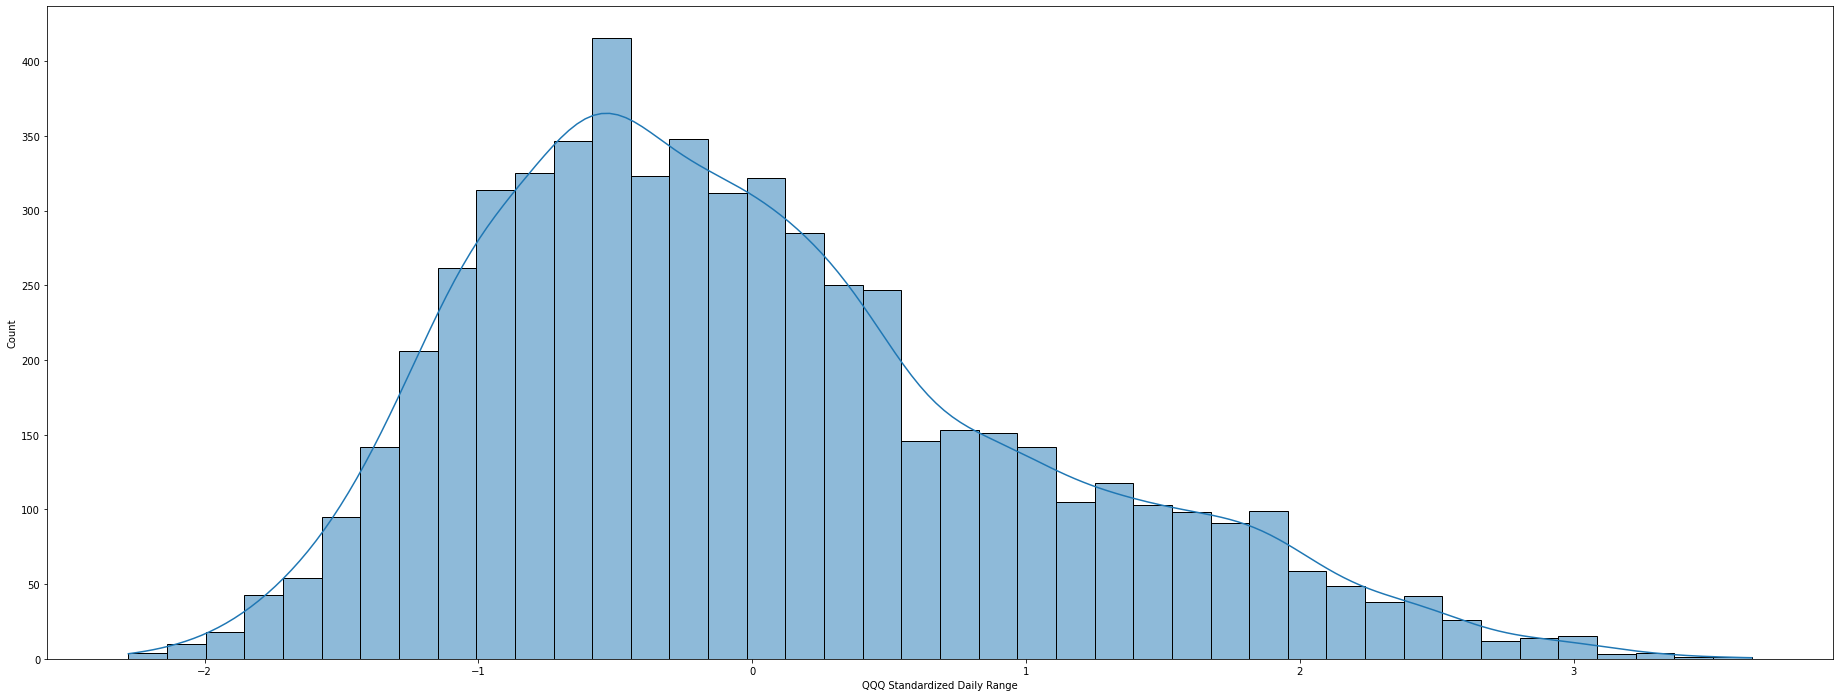

In [90]:
# Normalize the features
df['QQQ Standardized Daily Range'] = (df['Log Daily Range']-df['Log Daily Range'].mean())/np.std(df['Log Daily Range'])

# Plot a histogram of the standardized daily range data
plt.figure(figsize=(32,12))
sns.histplot(data=df,x='QQQ Standardized Daily Range',kde=True);
df.tail(15)

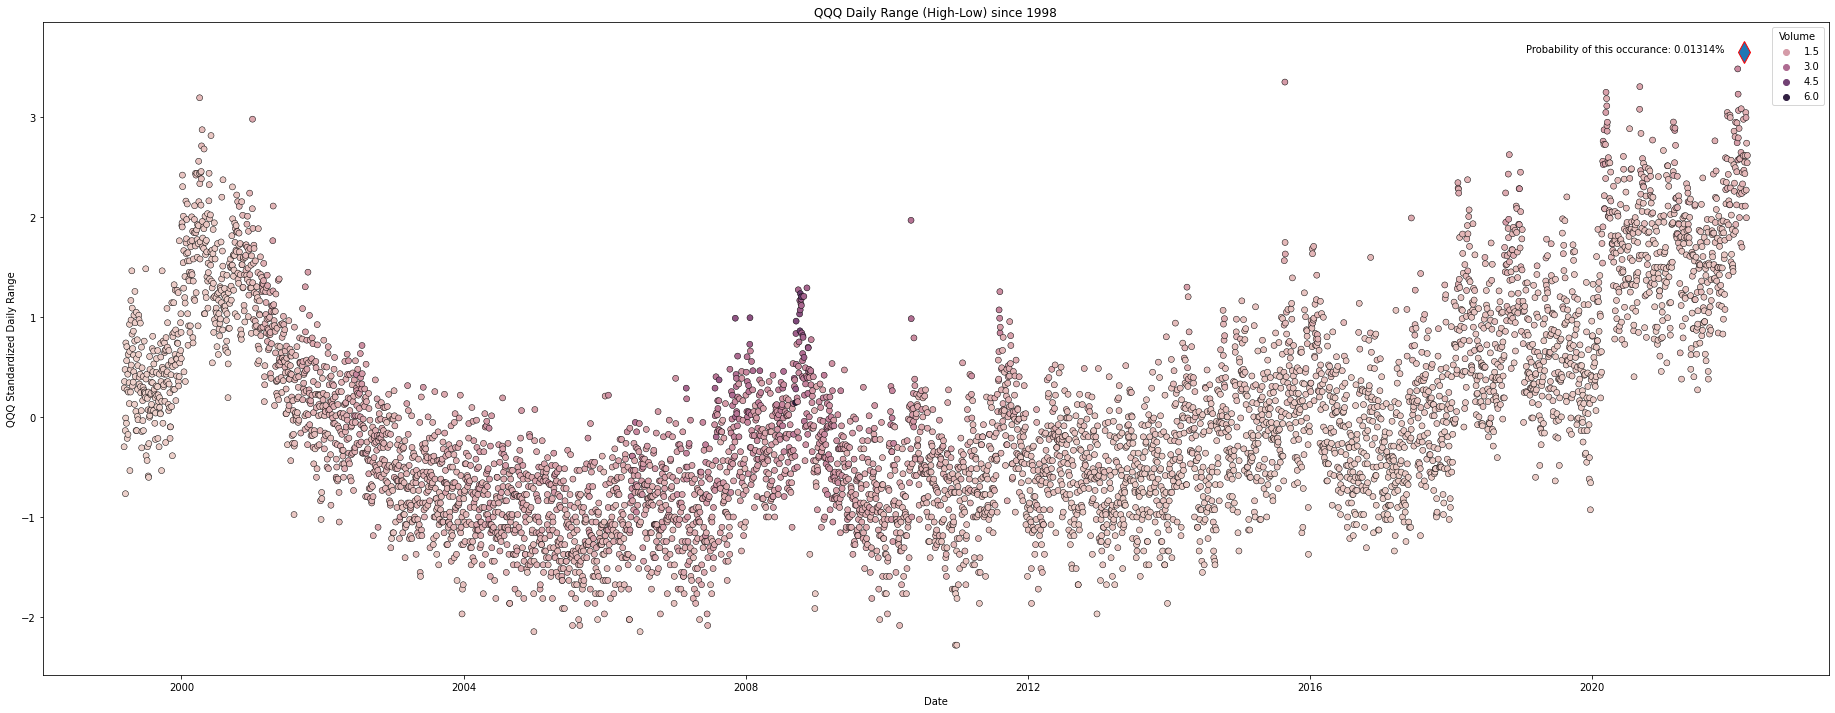

In [91]:
plt.figure(figsize=(32,12))
x = df.iloc[5779,0]
y = df.iloc[5779,10]
plt.plot(x, y, marker="d", markersize=15, markeredgecolor="red")
sns.scatterplot(x=df['Date'],y=df['QQQ Standardized Daily Range'],data=df,hue=df['Volume'],edgecolor="black").set(title='QQQ Daily Range (High-Low) since 1998');
df.tail(15)
import scipy.stats as st
prob=(1-st.norm.cdf(df.iloc[5779,10]))
z=("Probability of this occurance: "+"{:.5%}".format(prob));
plt.text(df.iloc[5000,0], y, z);